<a href="https://colab.research.google.com/github/Valeria-YL/2047880MINERIA/blob/main/Practicas/Practica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# Download latest version
path = kagglehub.dataset_download("sumedh1507/blood-donor-dataset")

print("Path to dataset files:", path)

df = pd.read_csv(os.path.join(path, "blood_donor_dataset.csv"))
df.head(1)

Using Colab cache for faster access to the 'blood-donor-dataset' dataset.
Path to dataset files: /kaggle/input/blood-donor-dataset


,donor_id,name,email,password,contact_number,city,blood_group,availability,months_since_first_donation,number_of_donation,pints_donated,created_at
0,1b8b4c828a,Norma Fisher,ysullivan@yahoo.com,P5hX6Syg*A,+61 461706749,Hobart,A+,No,65,31,62,2017-03-17


**PIE CHART** que muestra la proporción de donantes que están disponibles actualmente para donar frente a los que no lo están.

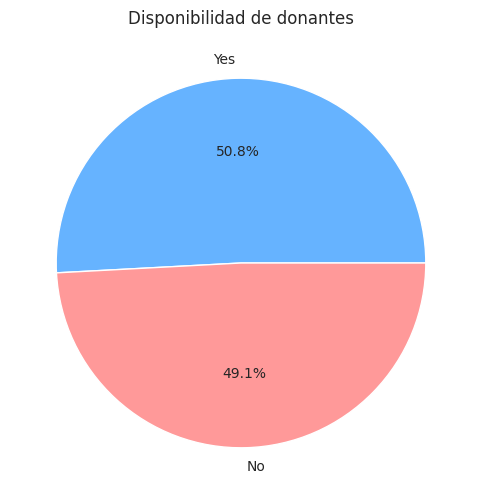

In [51]:
availability_counts = df['availability'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(availability_counts, labels=availability_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title("Disponibilidad de donantes")
plt.show()

**HISTOGRAMA** que muestra cuántos donantes se encuentran en los diferentes rangos de número de donaciones.

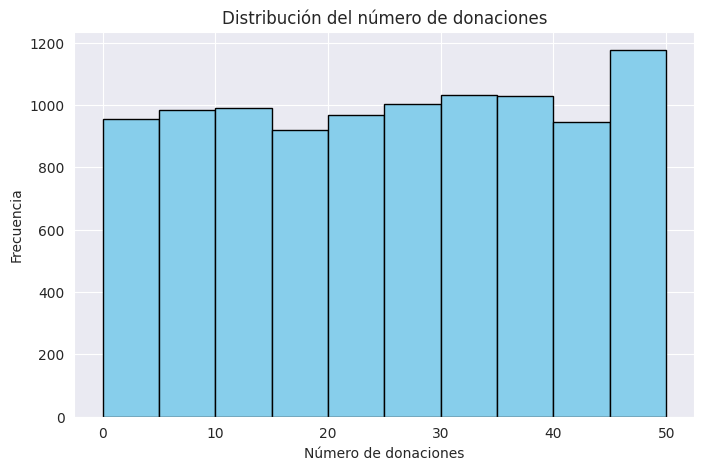

In [52]:
plt.figure(figsize=(8,5))
plt.hist(df['number_of_donation'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribución del número de donaciones")
plt.xlabel("Número de donaciones")
plt.ylabel("Frecuencia")
plt.show()

**BOXPLOT** que muestra las donaciones según el grupo sanguíneo

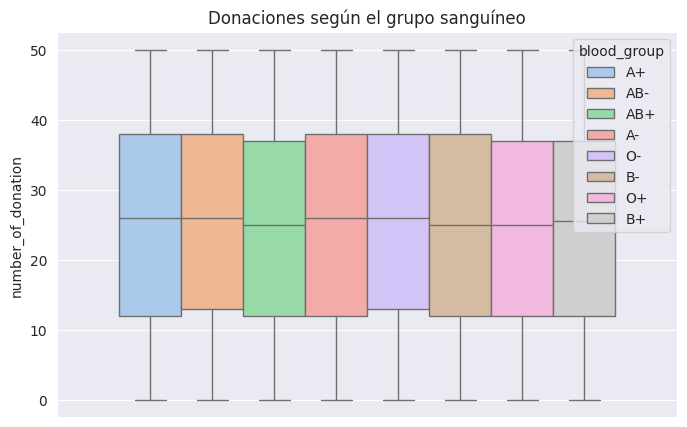

In [53]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, hue='blood_group', y='number_of_donation', palette='pastel')
plt.title("Donaciones según el grupo sanguíneo")

plt.show()

**SCATTER PLOTS** por grupo sanguíneo que muestran la frecuencia con la que los donantes han donado sangre a lo largo del tiempo.

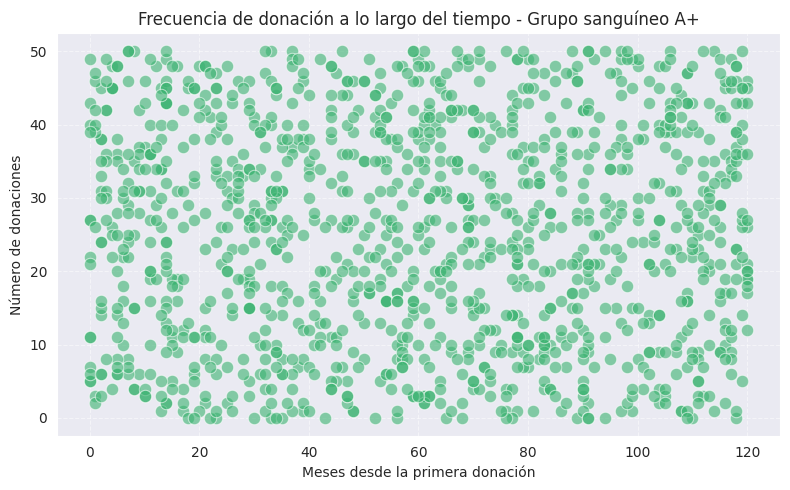

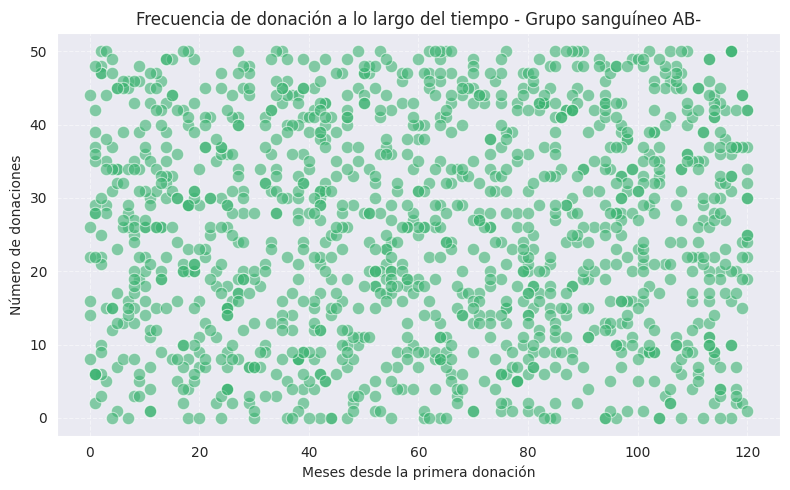

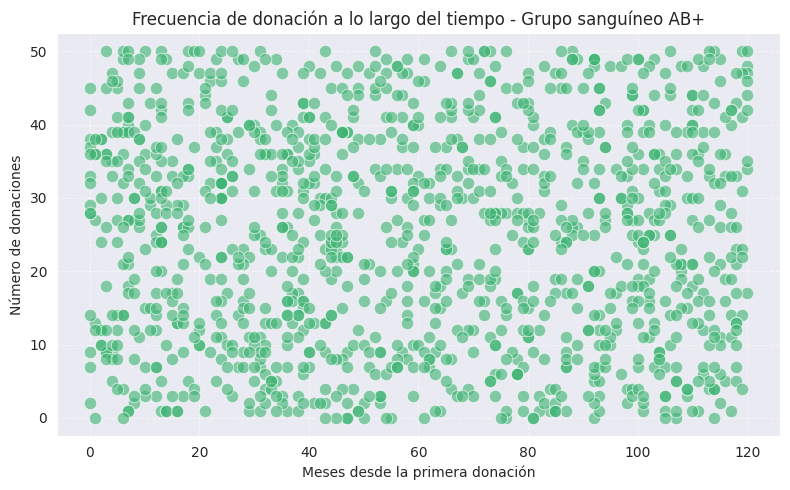

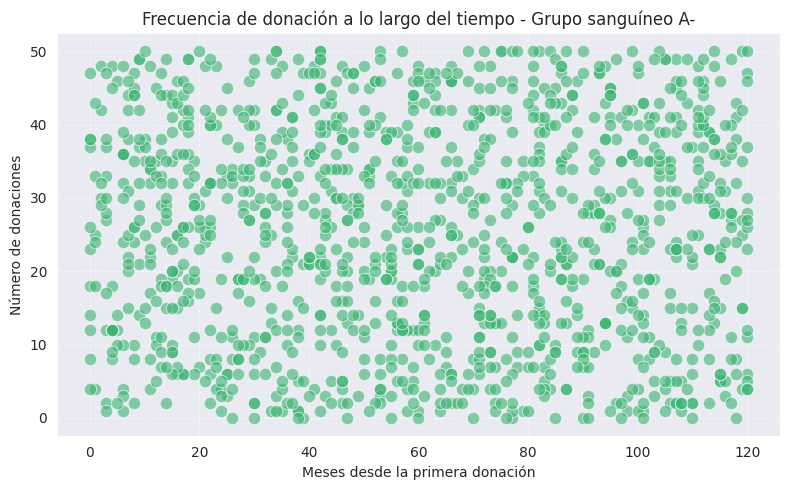

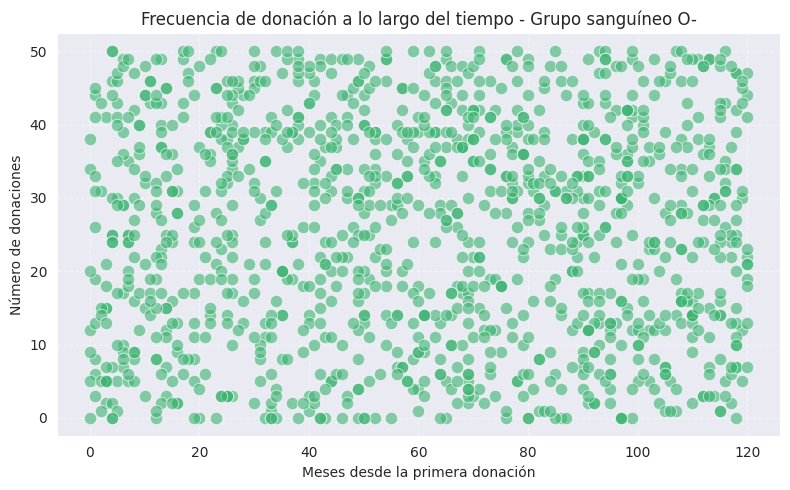

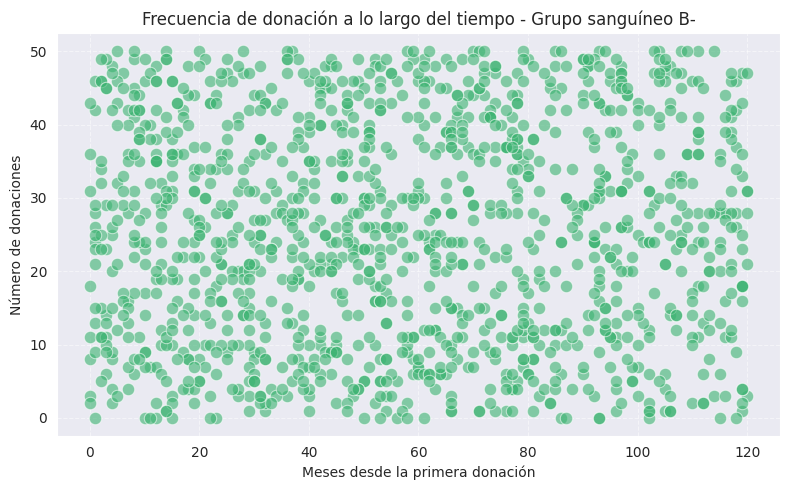

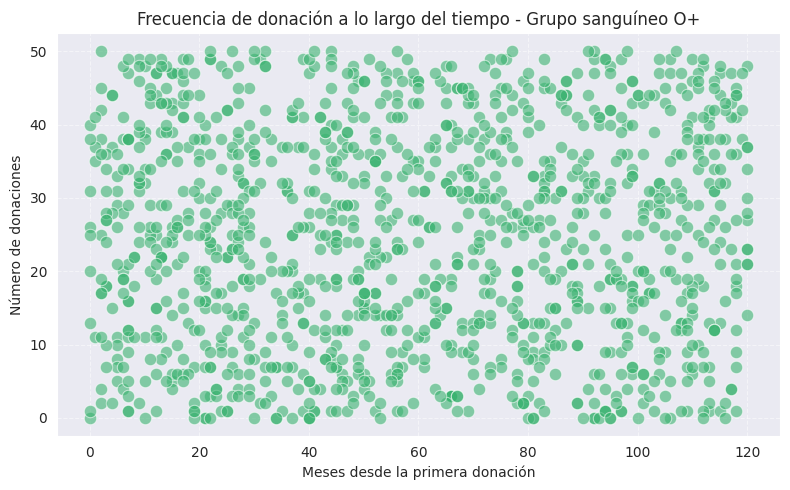

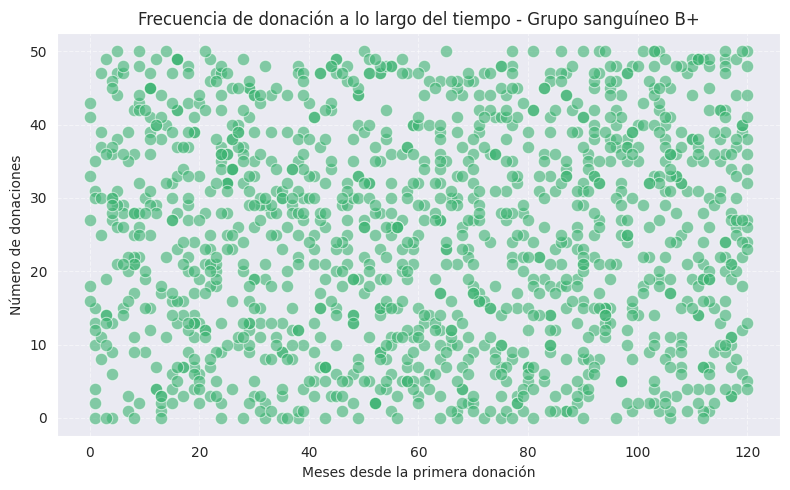

In [54]:
blood_groups = df['blood_group'].unique()

for group in blood_groups:
    subset = df[df['blood_group'] == group]
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=subset, x='months_since_first_donation', y='number_of_donation', color='mediumseagreen', s=80, alpha=0.6)
    plt.title(f"Frecuencia de donación a lo largo del tiempo - Grupo sanguíneo {group}")
    plt.xlabel("Meses desde la primera donación")
    plt.ylabel("Número de donaciones")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

 **BAR PLOT** que muestra qué ciudades tienen donantes más activos en promedio.

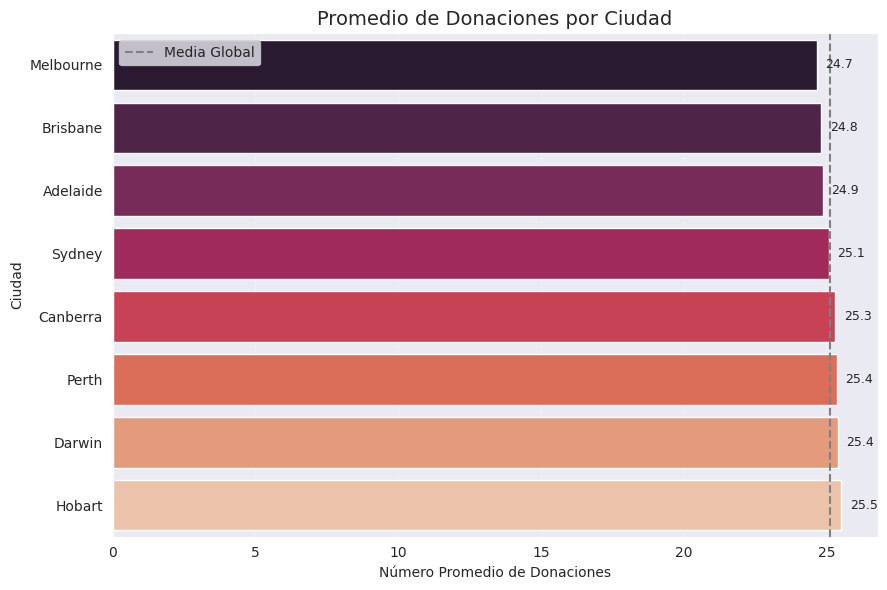

In [66]:
promedios_por_ciudad = df.groupby('city')['number_of_donation'].mean().reset_index()
promedios_por_ciudad = promedios_por_ciudad.sort_values(by='number_of_donation', ascending=True)

#Gráfico horizontal
plt.figure(figsize=(9,6))
sns.barplot(data=promedios_por_ciudad, y='city',x='number_of_donation',hue='city', palette='rocket',legend=False )
plt.title("Promedio de Donaciones por Ciudad", fontsize=14)
plt.xlabel("Número Promedio de Donaciones")
plt.ylabel("Ciudad")

for i, value in enumerate(promedios_por_ciudad['number_of_donation']):
    plt.text(value + 0.3, i, f"{value:.1f}", va='center', fontsize=9)

media_global = df['number_of_donation'].mean()
plt.axvline(media_global, color='gray', linestyle='--', label='Media Global')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()